In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("diabetes_clean.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Male,28.0,0,0,never,27.32,5.7,158,0
2,Female,36.0,0,0,current,23.45,5.0,155,0
3,Male,76.0,1,1,current,20.14,4.8,155,0
4,Female,20.0,0,0,never,27.32,6.6,85,0
...,...,...,...,...,...,...,...,...,...
60164,Female,26.0,0,0,never,34.34,6.5,160,0
60165,Female,40.0,0,0,never,40.69,3.5,155,0
60166,Male,66.0,0,0,former,27.83,5.7,155,0
60167,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
df_smoking_diabetes = df[ ["smoking_history", "diabetes"] ]
df_smoking_diabetes

,smoking_history,diabetes
0,never,0
1,never,0
2,current,0
3,current,0
4,never,0
...,...,...
60164,never,0
60165,never,0
60166,former,0
60167,never,0


/home/mystimorphix/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mystimorphix/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mystimorphix/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mystimorphix/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

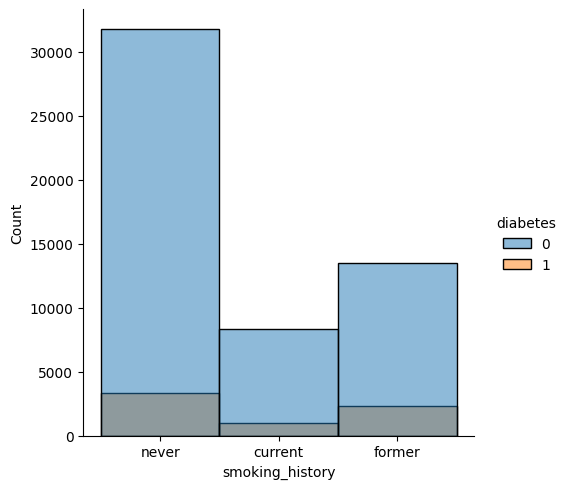

In [5]:
sns.displot(df_smoking_diabetes, x="smoking_history", hue="diabetes", discrete=True)

In [59]:
df_smoking_diabetes_counts = pd.DataFrame(df_smoking_diabetes.value_counts()).reset_index()
df_smoking_diabetes_counts

,smoking_history,diabetes,count
0,never,0,31746
1,former,0,13511
2,current,0,8338
3,never,1,3346
4,former,1,2280
5,current,1,948


# Format to Calculate Percentages and Create Graph

In [80]:
smoking_statuses = set(df_smoking_diabetes_counts["smoking_history"].to_list())
percentages = []

for status in smoking_statuses:
    # get counts for each smoking_history category
    df_temp = df_smoking_diabetes_counts[df_smoking_diabetes_counts["smoking_history"] == status]

    # calculate percentages in decimal form
    data = df_temp["count"].tolist()
    data = [status, data[1] / sum(data) * 100]
    percentages.append(data)
percentages

[['current', 10.208916648718501],
 ['former', 14.438604268254068],
 ['never', 9.534936737717999]]

In [86]:
df_smoking_diabetes_percentages = pd.DataFrame(percentages, columns=["Smoking Statuses", "Percentages"])
df_smoking_diabetes_percentages

,Smoking Statuses,Percentages
0,current,10.208917
1,former,14.438604
2,never,9.534937


<Axes: title={'center': 'Correlation of Smoking Statuses against Positive Diabetes Diagnoses'}, xlabel='Smoking Statuses'>

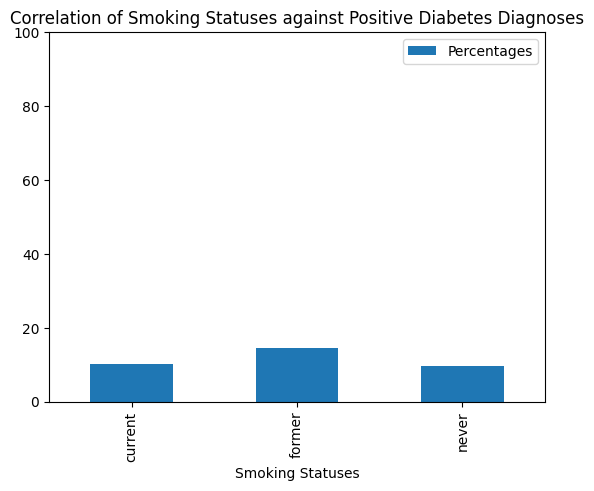

In [87]:
df_smoking_diabetes_percentages.plot(kind="bar", title="Correlation of Smoking Statuses against Positive Diabetes Diagnoses", x="Smoking Statuses", y="Percentages", ylim=(0,100))